# Simple Neural Network using Keras


## Introduction
Our use case is to build, train, and evaluate a prediction model for sales analysis.

In this model, we need to feed the advertising budget of TV, radio, and newspapers to the model and the model will forecast the possible sales.

## Dataset
The advertising dataset captures the sales revenue generated with respect to advertisement costs across numerous platforms like radio, TV, and newspapers.

### Features:

#### Digital: advertising dollars spent on Internet.
#### TV: advertising dollars spent on TV.
#### Radio: advertising dollars spent on Radio.
#### Newspaper: advertising dollars spent on Newspaper.

### Target (Label):
#### Sales budget

# Step 1: Data Preparation

### Import Libraries

In [34]:
# Import the necessary libraries

# For Data loading, Exploraotry Data Analysis, Graphing
import pandas as pd   # Pandas for data processing libraries
import numpy as np    # Numpy for mathematical functions

import matplotlib.pyplot as plt # Matplotlib for visualization tasks
import seaborn as sns # Seaborn for data visualization library based on matplotlib.
%matplotlib inline

import sklearn        # ML tasks
from sklearn.model_selection import train_test_split # Split the dataset
from sklearn.metrics import mean_squared_error  # Calculate Mean Squared Error

# Build the Network
from tensorflow import keras
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from keras.layers import Dense


#from keras.callbacks import EarlyStopping


In [36]:
# Next, you read the dataset into a Pandas dataframe.

url = './Advertising_2023.csv'
advertising_df= pd.read_csv(url,index_col=0)

In [139]:
advertising_df.head(10)

digital     TV  radio  newspaper  sales
1    345.15  156.0   37.8       69.2   22.1
2     66.75   46.0   39.3       45.1   10.4
3     25.80   18.3   45.9       69.3    9.3
4    227.25  145.1   41.3       58.5   18.5
5    271.20  165.2   10.8       58.4   12.9
6     13.05    8.7   48.9       75.0    7.2
7     86.25   57.5   32.8       23.5   11.8
8    180.30  120.2   19.6       11.6   13.2
9     12.90    8.6    2.1        1.0    4.8
10   299.70  199.8    2.6       21.2   10.6

In [140]:
# Pandas info() function is used to get a concise summary of the dataframe.
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [141]:
### Get summary of statistics of the data
advertising_df.describe()

digital          TV        radio    newspaper        sales
count  1199.000000  1199.00000  1199.000000  1199.000000  1199.000000
mean    135.472394   146.61985    23.240617    30.529942    14.005505
std     135.730821    85.61047    14.820827    21.712507     5.202804
min       0.300000     0.70000     0.000000     0.300000     1.600000
25%      24.250000    73.40000     9.950000    12.800000    10.300000
50%      64.650000   149.70000    22.500000    25.600000    12.900000
75%     256.950000   218.50000    36.500000    45.100000    17.400000
max     444.600000   296.40000    49.600000   114.000000    27.000000

In [142]:
#shape of dataframe - 1199 rows, five columns
advertising_df.shape

(1199, 5)

Let's check for any null values.

In [143]:
# The isnull() method is used to check and manage NULL values in a data frame.
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [144]:
#check there are any NAN values
advertising_df.isnull().values.any()

np.False_

## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

<Axes: >

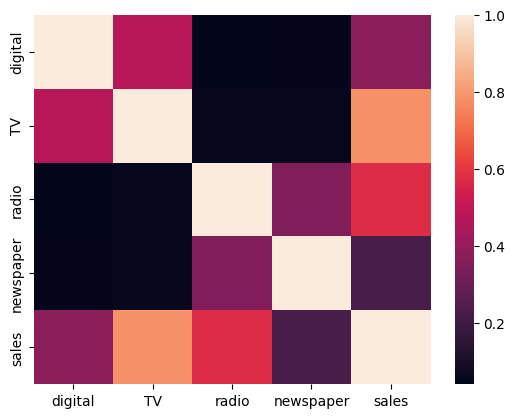

In [145]:
# The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph.
# The goal of the heatmap is to provide a colored visual summary of information.
sns.heatmap(advertising_df.corr())

<Axes: >

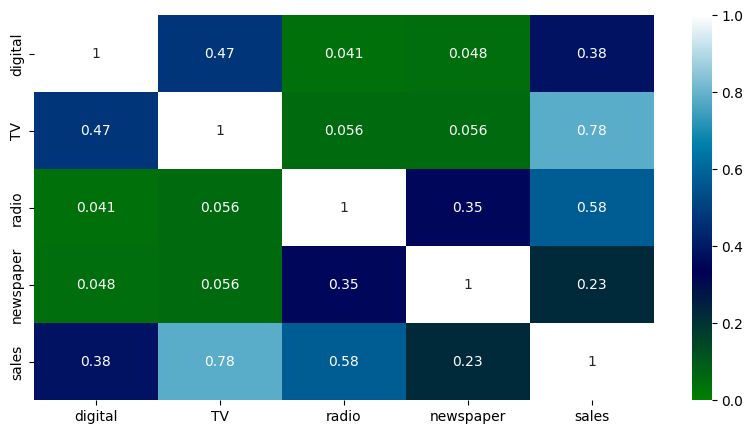

In [146]:
## Another option is to plot the heatmap so that the values are shown.

plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')


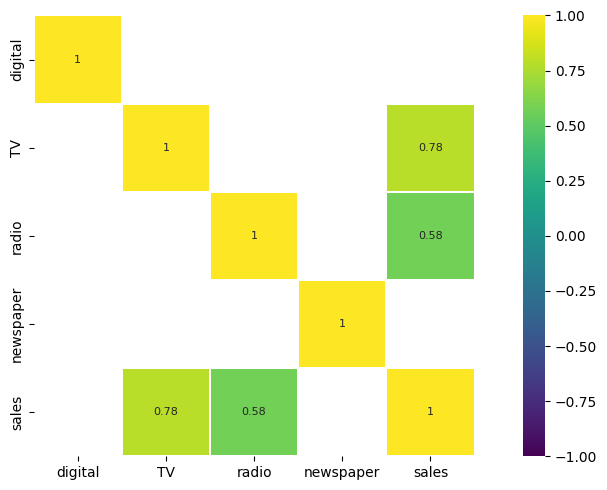

None

In [147]:
#create a correlation matrix
corr = advertising_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
display(plt.show())

In [148]:
advertising_df.corr()

digital        TV     radio  newspaper     sales
digital    1.000000  0.474256  0.041316   0.048023  0.380101
TV         0.474256  1.000000  0.055697   0.055579  0.781824
radio      0.041316  0.055697  1.000000   0.353096  0.576528
newspaper  0.048023  0.055579  0.353096   1.000000  0.227039
sales      0.380101  0.781824  0.576528   0.227039  1.000000

<Axes: >

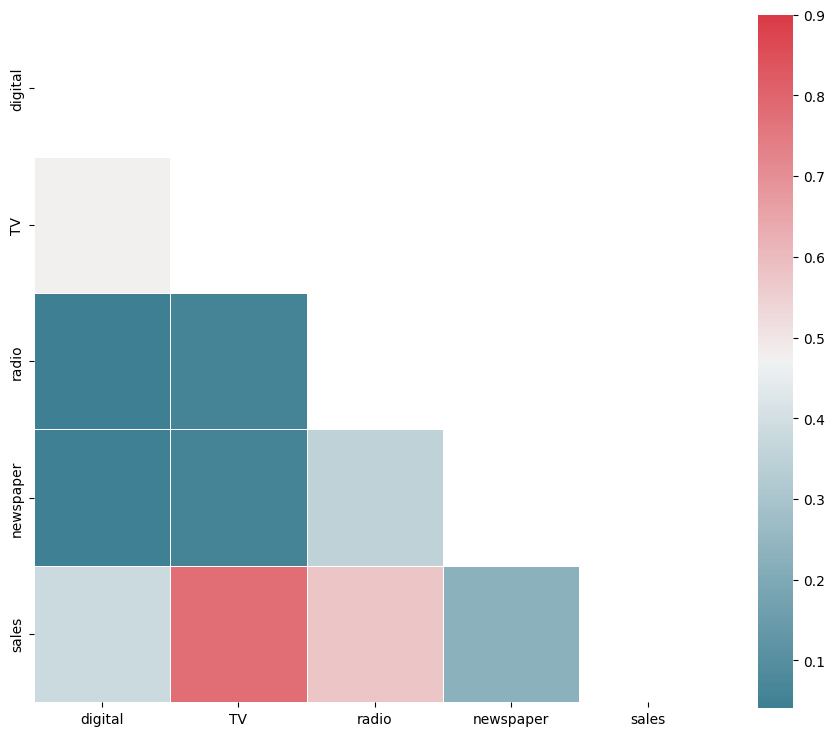

In [149]:
### Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(advertising_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(advertising_df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

Since Sales is our target variable, we should identify which variable correlates the most with Sales.

As we can see, TV has the highest correlation with Sales.
Let's visualize the relationship of variables using scatterplots.

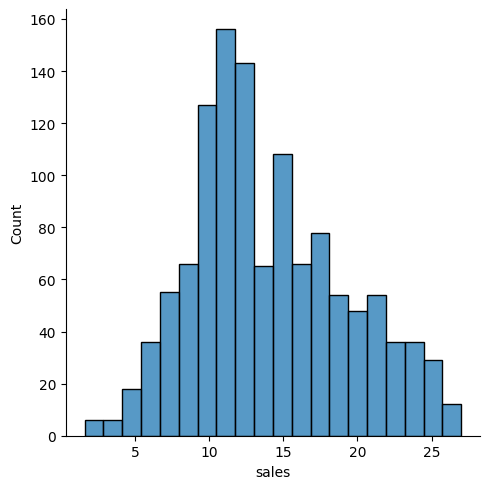

In [150]:
# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence you choose one particular column of the dataset.
sns.displot(advertising_df['sales'])

Let's visualize the relationship of variables using scatterplots. -- Separately

Another way to view the linear relationsips between variables is to use a "for loop" that does the same as above.

It seems there's no clear linear relationships between the predictors.

At this point, we know that the variable TV will more likely give better prediction of Sales because of the high correlation and linearity of the two.

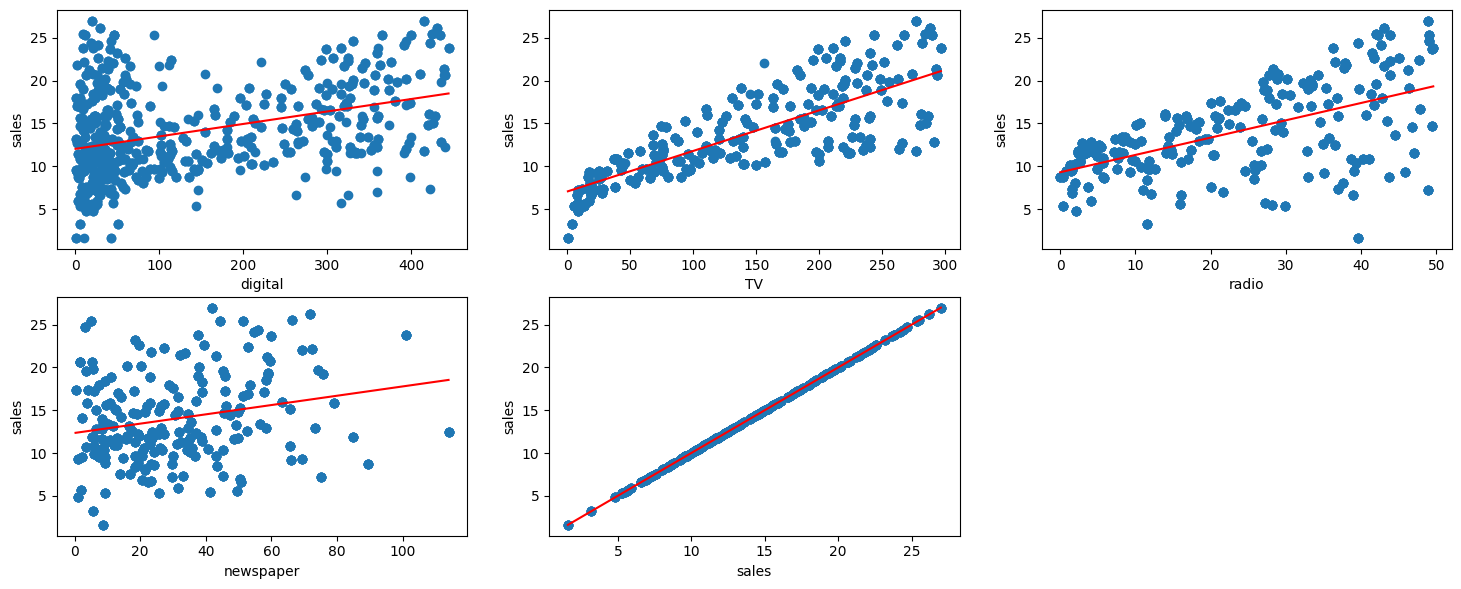

In [152]:
'''=== Show the linear relationship between features  and sales Thus, it provides that how the scattered
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with sales
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x_data = advertising_df[col] #x-axis
    y_data = advertising_df['sales'] #y-axis
    plt.plot(x_data, y_data, 'o')

    # Create regression line
    plt.plot(np.unique(x_data), np.poly1d(np.polyfit(x_data, y_data, 1)) (np.unique(x_data)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label


Concluding results after observing the Graph
The relation bw TV and Sales is stong and increases in linear fashion
The relation bw Radio and Sales is less stong
The relation bw TV and Sales is weak

## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, you try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression.

Let's now begin to train your regression model! You will need to first split up your data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. You will toss out the Address column because it only has text info that the linear regression model can't use.

#### Data Preprocessing

##### Split: X (features) and y (target)
Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [153]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

##### Scaling (Normalization)

In [154]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(X.values)
print(normalized_feature)

[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


##### Train - Test - Split

Now let's split the data into a training and test set.  Note:  Best pracices is to split into three - training, validation, and test set.

By default - It splits the given data into 75-25 ration


In [155]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [156]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(719, 4) (480, 4) (719,) (480,)


# Step 2:  Build Network (Default params)
Because so few samples are available, we will be using a very small network with two hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

#### Build and Train the Network

In [157]:
## Build Model (Building a three layer network - with one hidden layer)
model = Sequential()
model.add(Dense(4,input_dim=4, activation='relu'))                                                  # You don't have to specify input size.Just define the hidden layers
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

#  Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 32)

Epoch 1/32


/Users/alexhaker/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3746 - mse: 11.3746 - val_loss: 8.7893 - val_mse: 8.7893
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.6464 - mse: 8.6464 - val_loss: 8.1507 - val_mse: 8.1507
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1314 - mse: 9.1314 - val_loss: 7.7739 - val_mse: 7.7739
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1799 - mse: 8.1799 - val_loss: 7.4482 - val_mse: 7.4482
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1058 - mse: 8.1058 - val_loss: 7.2190 - val_mse: 7.2190
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4151 - mse: 7.4151 - val_loss: 7.0305 - val_mse: 7.0305
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4069 - mse: 7.4069 - val_loss: 6.7805 - val_mse: 6.7805
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6485 - mse: 7.6485 - val_loss: 6.6047 - val_mse: 6.6047
Epoch 9/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2576 - mse: 7.2576 - 

#### Model Summary
Once we've run data through the model, we can call .summary() on the model to get a high-level summary of our network.

In [158]:
#inspect the model
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119 (480.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 80 (324.00 B)

In [159]:
model.evaluate(X_test, y_test)[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 3.8295 - mse: 3.8295


3.7714993953704834

### Visualization

Running .fit (or .fit_generator) returns a History object which collects all the events recorded during training. You can plot the training and validation curves for the model loss and mse by accessing these elements of the History object.

<Axes: >

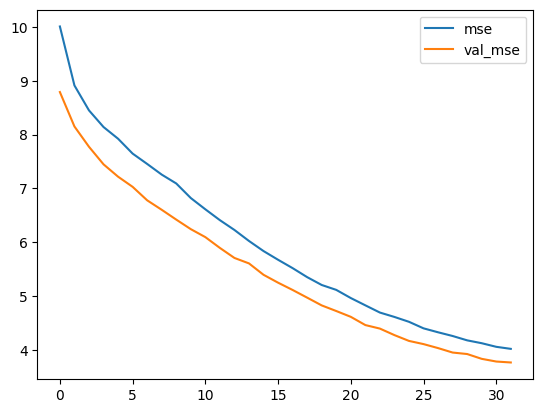

In [160]:
MSE_COLS = ["mse", "val_mse"]

pd.DataFrame(history.history)[MSE_COLS].plot()

You can add more 'flavor' to the graph by making it bigger and adding labels and names, as shown below.

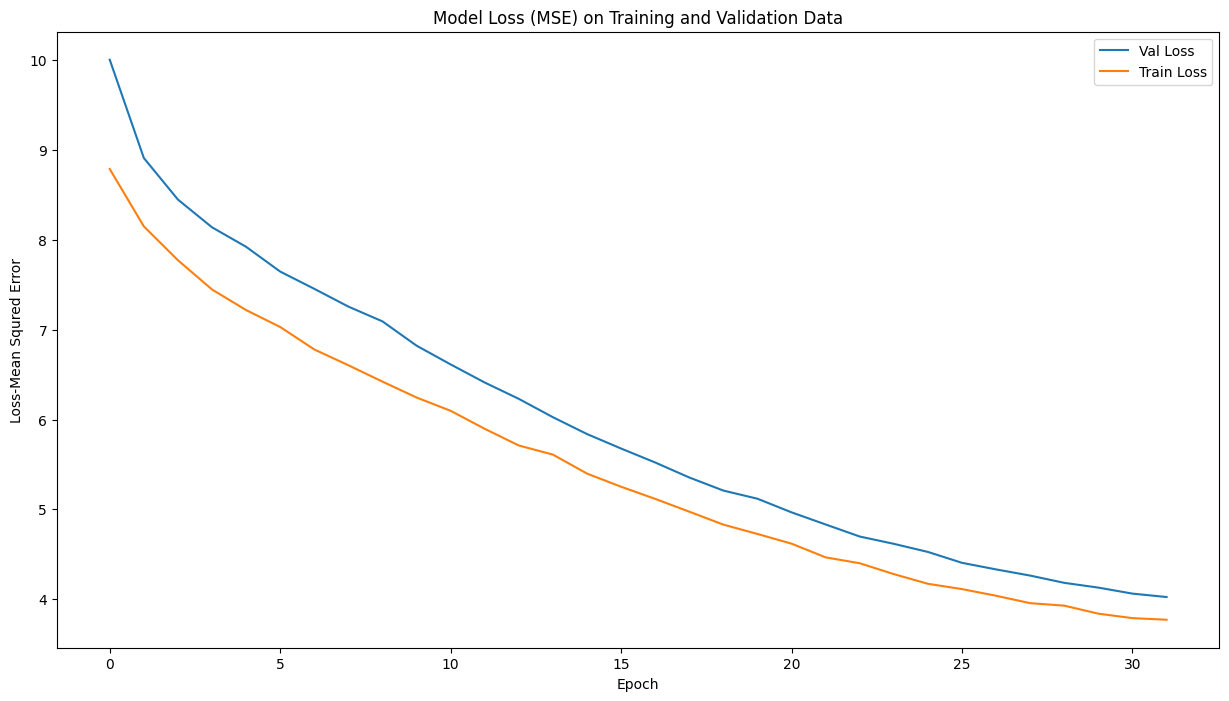

In [161]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()


### Predict Sales

In [162]:
'''=== predict the SALES =='''

# predict SALES using the test data
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
[26.00459   18.60708   17.218225  21.753778  16.693495  25.86678
 11.958498  20.851566  18.147058  14.175231   5.685706  16.212065
  5.7289357  8.463458  12.035726   7.2925367 22.419855  14.693945
  3.6182976 16.63261   20.84152    6.2244077 11.839067  11.532706
  7.8286734  2.991292  13.700759  16.322416  11.25332   10.835978
 14.7343445 17.07915   19.81882   14.8862505 14.599901   6.1717706
 23.609015  15.205589  12.024281  18.061691  16.936255  14.237623
  7.3862495 14.008416  13.5273    14.24649    7.190278  23.609015
 13.863916   8.465877   9.768091  12.035726  11.448605  15.596256
  3.7221503 18.255621  15.777794  21.588171   9.147182  12.325101
 11.298139  12.557519  11.5654545 13.196683   8.166322  11.534903
  8.95966   20.605207   6.4317927 22.732115   5.861864  23.04154
  7.37437   19.635265  15.129094  15.84327   17.729408  12.52485
 17.07915   20.866314  17.446651  19.07067   18.012989  16.989176
 15.496279  16.781528  10.802012   8.

### True and Predicted Values

In [163]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), columns=['True Value', 'Predicted Value'])
true_predicted.head(6) # Show first six rows

True Value  Predicted Value
0        26.2        26.004589
1        19.0        18.607080
2        12.8        17.218225
3        20.8        21.753778
4        16.9        16.693495
5        23.8        25.866779

Visualize the preditction.

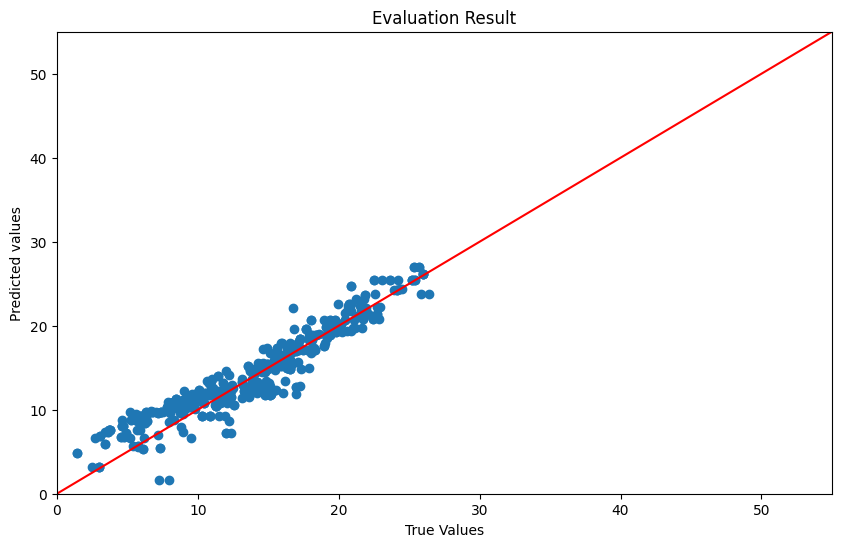

In [164]:
# visualize the prediction uisng diagonal line
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(test_predictions, y_test) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

Show the accuracy of Linear Regression on the dataset. The linear regression graph is created by train data and the model line is shown by the blue line which is created using test data and predicted data as we can see most of the red dots are on the line, thus we can say that model has produced the best-fit line.

<Axes: xlabel='sales'>

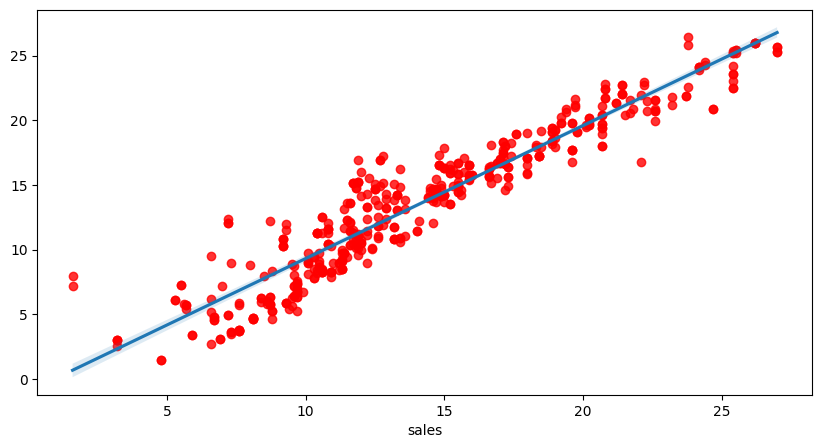

In [165]:
#Accuracy of linear regression on the dataset


plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=test_predictions, scatter_kws={'color':'red'})

### Evaluation

Step 6 - Predict on the Test Data and Compute Evaluation Metrics
The first line of code predicts on the train data, while the second line prints the RMSE value on the train data. The same is repeated in the third and fourth lines of code which predicts and prints the RMSE value on test data.

In [166]:
pred_train= model.predict(X_train)
print('MSE train data:');
print(np.sqrt(mean_squared_error(y_train, pred_train)))

pred= model.predict(X_test)
print('MSE test data:')
print(np.sqrt(mean_squared_error(y_test,pred)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
MSE train data:
1.9978975100703624
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
MSE test data:
1.9420347749944464


Evaluation of the Model Performance
The output above shows that the RMSE, which is our evaluation metric, was 3.784 thousand for train data and 3.750 thousand for test data. Ideally, the lower the RMSE value, the better the model performance. However, in contrast to accuracy, it is not straightforward to interpret RMSE as we would have to look at the unit which in our case is in thousands.

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because you want to minimize them.

# Step 3:  Build Network (Experiment #1)
More neurons = 8;
Different activation function = tanh;
More epoch = 64;
Change distribution train/test data to 75/25

#### Build and Train the Network

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(299, 4) (900, 4) (299,) (900,)


In [179]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))    # More neurons
model.add(Dense(6, activation='tanh'))                 # Different activation
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=64)  # More epochs

Epoch 1/64


/Users/alexhaker/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 195.5896 - mse: 195.5896 - val_loss: 201.4564 - val_mse: 201.4564
Epoch 2/64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 189.9705 - mse: 189.9705 - val_loss: 199.0372 - val_mse: 199.0372
Epoch 3/64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 189.3874 - mse: 189.3874 - val_loss: 196.7229 - val_mse: 196.7229
Epoch 4/64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 187.8355 - mse: 187.8355 - val_loss: 194.8850 - val_mse: 194.8850
Epoch 5/64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 187.5002 - mse: 187.5002 - val_loss: 193.0472 - val_mse: 193.0472
Epoch 6/64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 187.7054 - mse: 187.7054 - val_loss: 191.1060 - val_mse: 191.1060
Epoch 7/64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 193.5260 - mse: 193.5260 - val_loss: 188.9994 - val_mse: 188.9994
Epoch 8/64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 187.6754 - mse: 187.6754 - val_loss: 186.9007 - val_mse: 186.9007
Epoch 9/64
10/10 ━━

#### Model Summary
Once we've run data through the model, we can call .summary() on the model to get a high-level summary of our network.

In [180]:
#inspect the model
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.20 KB)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204 (820.00 B)

In [181]:
model.evaluate(X_test, y_test)[1]

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 89.6136 - mse: 89.6136


90.8520278930664

### Visualization

<Axes: >

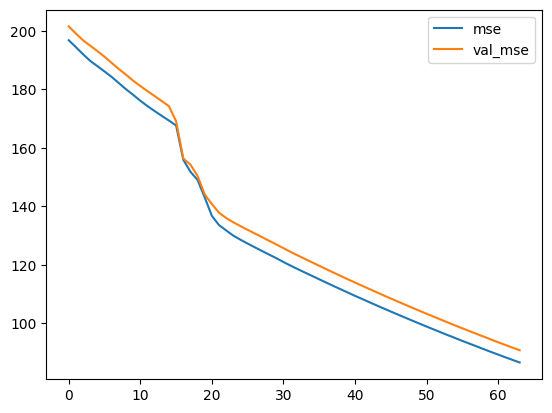

In [182]:
MSE_COLS = ["mse", "val_mse"]

pd.DataFrame(history.history)[MSE_COLS].plot()

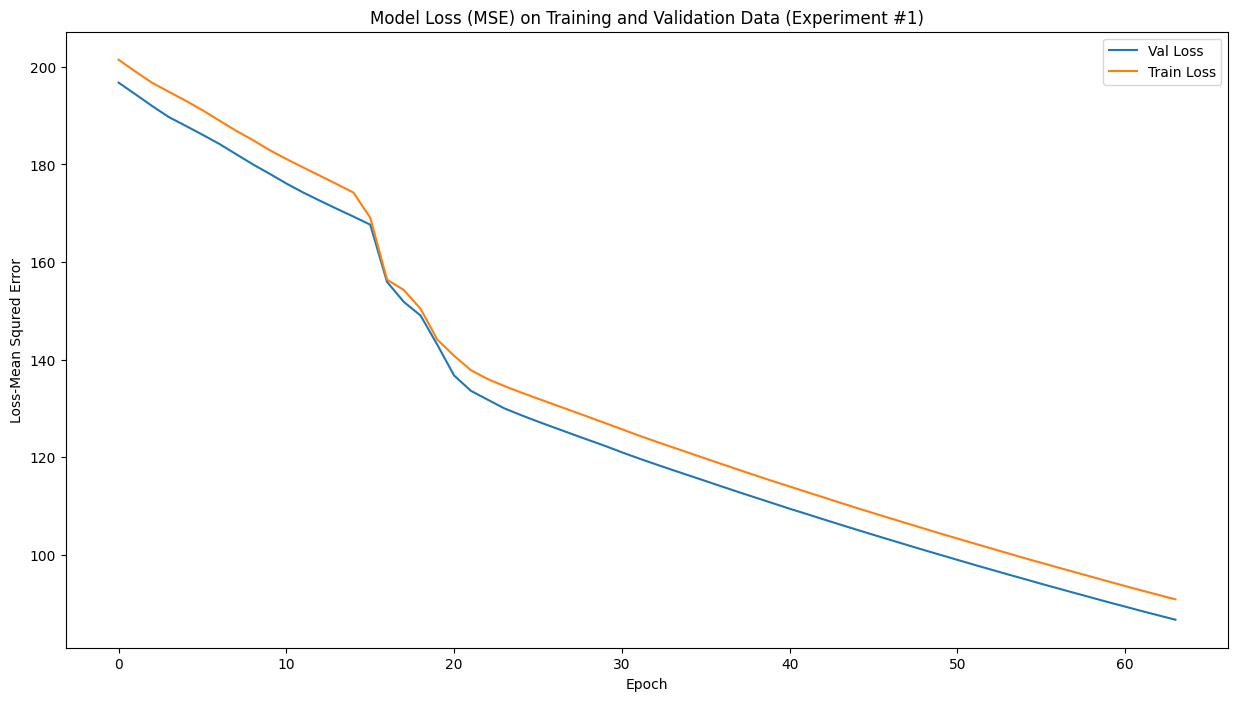

In [183]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data (Experiment #1)')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()


### Predict Sales

In [184]:
'''=== predict the SALES =='''

# predict SALES using the test data
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
[6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736
 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736
 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736
 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736
 5.896004  6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736
 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736
 6.0981736 6.06743   6.0981736 6.0981736 6.0981736 6.0981736 6.0981736
 6.0981736 6.0981736 6.0398993 6.0981736 6.0981736 6.0981736 6.094232
 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.06743   6.0981736
 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736
 6.0981736 6.0981736 6.097475  6.0981736 3.7818954 6.0981736 6.0981736
 3.7923045 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736
 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736 6.0981736
 6.0981736 6.0981736 6.0981736 6.0981

### True and Predicted Values

In [185]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), columns=['True Value', 'Predicted Value'])
true_predicted.head(6) # Show first six rows

True Value  Predicted Value
0        11.7         6.098174
1        18.0         6.098174
2        23.8         6.098174
3        21.5         6.098174
4        23.8         6.098174
5        21.7         6.098174

### Evaluation

In [186]:
pred_train= model.predict(X_train)
print('MSE train data:');
print(np.sqrt(mean_squared_error(y_train, pred_train)))

pred= model.predict(X_test)
print('MSE test data:')
print(np.sqrt(mean_squared_error(y_test,pred)))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MSE train data:
9.2822378797883
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
MSE test data:
9.531632782132833


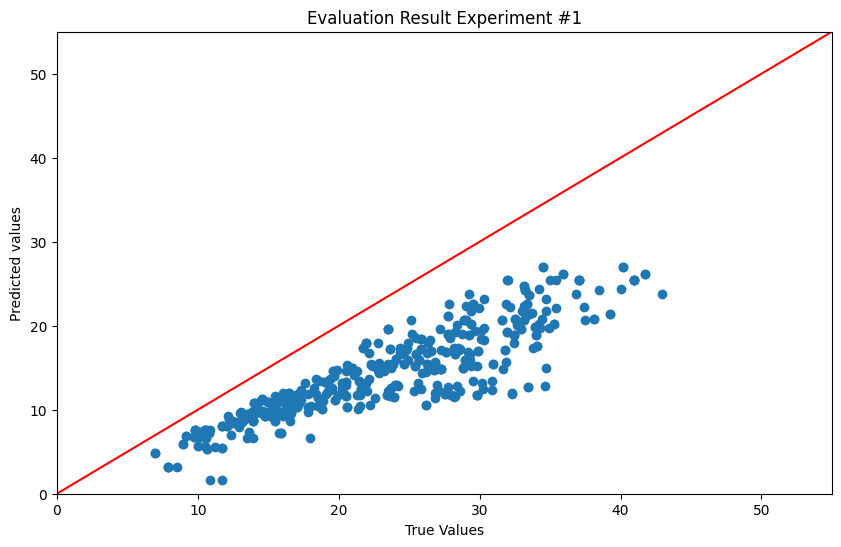

In [198]:
# visualize the prediction uisng diagonal line
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(test_predictions, y_test) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result Experiment #1')
plt.show()

Current expiremt shows bad results. Seems it is overtrained and predicted results are mostly the same.

# Step 4:  Build Network (Experiment #2)
Added extra hidden layer; Use 'sgd' optimizer; Use 'mae' loss

#### Build and Train the Network

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(719, 4) (480, 4) (719,) (480,)


In [201]:
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))                 # Extra hidden layer
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mae', metrics=['mae'])  # Different optimizer + loss
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=32)

Epoch 1/32
 1/23 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 29.2210 - mae: 29.2210

/Users/alexhaker/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.0055 - mae: 18.0055 - val_loss: 14.0250 - val_mae: 14.0250
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.7120 - mae: 13.7120 - val_loss: 13.7950 - val_mae: 13.7950
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.2471 - mae: 13.2471 - val_loss: 13.5650 - val_mae: 13.5650
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.1637 - mae: 13.1637 - val_loss: 13.3350 - val_mae: 13.3350
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9853 - mae: 12.9853 - val_loss: 13.1050 - val_mae: 13.1050
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.7135 - mae: 12.7135 - val_loss: 12.8750 - val_mae: 12.8750
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.3214 - mae: 12.3214 - val_loss: 12.6451 - val_mae: 12.6451
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.1750 - mae: 12.1750 - val_loss: 12.4195 - val_mae: 12.4195
Epoch 9/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [202]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48 (196.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [203]:
model.evaluate(X_test, y_test)[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 7.3695 - mae: 7.3695


7.362118721008301

### Predict Sales

In [204]:
# predict SALES using the test data
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
[7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293 7.1023293
 7.1023293 7.1023293 7.1023293 7.102

### Evaluation

In [205]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), columns=['True Value', 'Predicted Value'])
true_predicted.head(6) # Show first six rows

True Value  Predicted Value
0        26.2         7.102329
1        19.0         7.102329
2        12.8         7.102329
3        20.8         7.102329
4        16.9         7.102329
5        23.8         7.102329

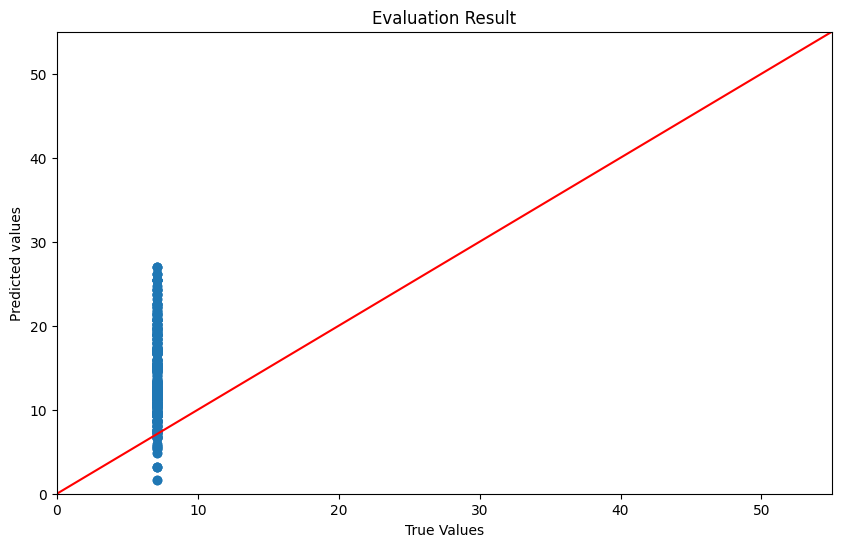

In [206]:
# visualize the prediction uisng diagonal line
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(test_predictions, y_test) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()